**Pandas Dataframe**
---------------
Uma biblioteca muito utilizada em Ciência de Dados é o pandas. E a estrutura de dados mais útil é o dataframe. Vamos fazer uma Análise real, com Dados Públicos do SUS de Santa Catarina, créditos para a Larissa Lautert, do PyLadies Florianópolis, que me forneceu este notebook. O problema analisado é a excessiva demora na Fila do SUS, naquele dataset concreto de dados.

In [1]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

Pandas é a biblioteca que carrego na memória com um apelido pd, low_memory normalmente é True, porém, para acelerar nossa carga colocaremos False, matplotlib permite visualizações básicas e faremos os gráficos diretamente nos dataframes, max_columns e max_rows apenas para diminuir a apresentação de conjuntos muito extensos de dados.

In [2]:
filename = 'fila-publica-2017-11-30.csv'
df = pd.read_csv(filename)

c:\users\fmasa\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (7,12,13,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Este arquivo deve estar na mesma pasta do seu notebook. Tivemos alguns avisos, que não irão afetar nossa Análise.

In [3]:
df.shape

(1306967, 17)

In [4]:
df.describe()

,POSIÇÃO,TEMPO MÉDIO DE ESPERA(DIAS),NASCIMENTO,CNES DA UNIDADE SOLICITANTE,CÓDIGO SIGTAP DO PROCEDIMENTO
count,1.306967e+06,1.288724e+06,0.0,1.306967e+06,1.305728e+06
mean,2.502004e+03,1.942741e+02,NaN,3.539747e+06,2.414849e+08
std,3.291319e+03,3.145126e+02,NaN,1.972460e+06,5.118480e+07
min,1.000000e+00,0.000000e+00,NaN,1.925900e+04,2.040601e+07
25%,2.490000e+02,3.100000e+01,NaN,2.418916e+06,2.020602e+08
50%,1.011000e+03,9.900000e+01,NaN,2.660792e+06,2.060101e+08
75%,3.351000e+03,1.590000e+02,NaN,5.465893e+06,3.010101e+08
max,1.874000e+04,2.019000e+03,NaN,9.362223e+06,7.010701e+08


Visualizamos dados estatísticos das colunas que temos. Estamos entrevistando esta base focando o Tempo Médio de Espera, podemos ver que, na média, o tempo é de 194 dias. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306967 entries, 0 to 1306966
Data columns (total 17 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   SERVIÇO                             1306967 non-null  object 
 1   CENTRAL DE REGULAÇÃO/RESPONSÁVEL    1306967 non-null  object 
 2   MUNICÍPIO DE RESIDÊNCIA             1306967 non-null  object 
 3   POSIÇÃO                             1306967 non-null  int64  
 4   TEMPO MÉDIO DE ESPERA(DIAS)         1288724 non-null  float64
 5   CLASSIFICAÇÃO                       1306967 non-null  object 
 6   TIPO DA LISTA                       1306967 non-null  object 
 7   DOCUMENTO                           1306967 non-null  object 
 8   DATA DA SOLICITAÇÃO                 1306273 non-null  object 
 9   CIDADÃO                             1306967 non-null  object 
 10  NASCIMENTO                          0 non-null        float64
 11  DESCRIÇÃO D

Por uma razão de conveniência iremos remover os espaços das colunas

In [6]:
df.rename(columns={'MUNICÍPIO DE RESIDÊNCIA': 'MUNICÍPIODERESIDÊNCIA',
                   'CENTRAL DE REGULAÇÃO/RESPONSÁVEL': 'CENTRALDEREGULAÇÃO/RESPONSÁVEL',
                   'TEMPO MÉDIO DE ESPERA(DIAS)': 'TEMPOMÉDIODEESPERA(DIAS)',
                   'DATA DA SOLICITAÇÃO': 'DATADASOLICITAÇÃO',
                   'DESCRIÇÃO DO PROCEDIMENTO': 'DESCRIÇÃODOPROCEDIMENTO',
                   'CNES DA CENTRAL EXECUTANTE': 'CNESDACENTRALEXECUTANTE',
                   'CNES DA UNIDADE SOLICITANTE': 'CNESDAUNIDADESOLICITANTE'
                  }, inplace=True)

In [7]:
df.sample(10)

,SERVIÇO,CENTRALDEREGULAÇÃO/RESPONSÁVEL,MUNICÍPIODERESIDÊNCIA,POSIÇÃO,TEMPOMÉDIODEESPERA(DIAS),CLASSIFICAÇÃO,TIPO DA LISTA,DOCUMENTO,DATADASOLICITAÇÃO,CIDADÃO,NASCIMENTO,DESCRIÇÃODOPROCEDIMENTO,CNES DA CENTRAL SOLICITANTE,CNESDACENTRALEXECUTANTE,CNESDAUNIDADESOLICITANTE,CÓDIGO SIGTAP DO PROCEDIMENTO,DESCRIÇÃO DO GRUPO DO PROCEDIMENTO
498698,Consulta,CENTRO DE SAUDE,AGUAS MORNAS,1270,0.0,4 - Azul,Regulada,704003383010861,19/04/2017 09:52:01,M D L P S,NaN,CONSULTA EM OFTALMOLOGIA - EXTRA,6388493,6375642,2609681,301010072.0,NaN
994651,Consulta,CS PONTA DAS CANAS,FLORIANOPOLIS,126,280.0,3 - Verde,Regulada,702504373227639,16/10/2017 10:25:58,O O D S,NaN,CONSULTA EM UROLOGIA - GERAL,6939392,6939392,2692082,301010072.0,NaN
202518,Exame,CENTRO DE SAUDE JARDIM ELDORADO,PALHOCA,960,123.0,4 - Azul,Fila única,703406228269319,11/05/2017 13:27:40,F N C D S,NaN,GLICEMIA DE JEJUM,421190,6082351,5932122,202010473.0,GRUPO - PATOLOGIA CLINICA (EXAMES DE LABORATORIO)
501670,Exame,UNIDADE DE SAUDE PREFEITO JOSE KEHRIG,SANTO AMARO DA IMPERATRIZ,249,32.0,4 - Azul,Regulada,704207292226189,16/11/2017 08:08:30,M A V,NaN,TGO,6375642,6375642,2418185,202010643.0,GRUPO - PATOLOGIA CLINICA (EXAMES DE LABORATORIO)
695506,Exame,CENTRO DE SAUDE FORQUILHINHAS,SAO JOSE,2861,464.0,4 - Azul,Fila única,708609568186888,15/12/2015 11:08:35,N V P S,NaN,TORAX : PA E PERFIL,5908418,5908418,2663813,204030153.0,GRUPO - RADIODIAGNOSTICO
226107,Exame,CENTRO DE SAUDE PINHEIRA,PALHOCA,2955,116.0,4 - Azul,Fila única,700004179050506,07/07/2017 18:22:13,M L D,NaN,URINA 1,421190,6082351,2418355,202050017.0,GRUPO - PATOLOGIA CLINICA (EXAMES DE LABORATORIO)
1021167,Exame,CS BARRA DA LAGOA,FLORIANOPOLIS,3234,570.0,4 - Azul,Regulada,898000694450989,09/10/2017 11:30:47,E O G,NaN,COLONOSCOPIA,6939392,6939392,2692473,209010029.0,NaN
1075978,Consulta,UAS LEO DE CARVALHO,BLUMENAU,718,65.0,4 - Azul,Regulada,704500399482019,16/10/2017 10:08:31,T P,NaN,CONSULTA EM PROCTOLOGIA - GERAL,2353654,2353654,2512734,301010072.0,NaN
161942,Consulta,UNIDADE BASICA DE SAUDE RIO BONITO,ITAJAI,2260,34.0,4 - Azul,Fila única,704502360966513,09/10/2017 17:18:03,J P,NaN,CONSULTA EM ORTOPEDIA - GERAL,420820,9208305,2513986,301010072.0,NaN
1018026,Exame,CS CAPOEIRAS,FLORIANOPOLIS,93,570.0,1 - Vermelho,Regulada,898001159154858,27/04/2016 15:46:23,B P P F,NaN,COLONOSCOPIA,6939392,6939392,19488,209010029.0,NaN


Amostra de 10 itens do nosso dataset. 

**Exercício**

Clique na célula e tecle shift enter

<AxesSubplot:ylabel='SERVIÇO'>

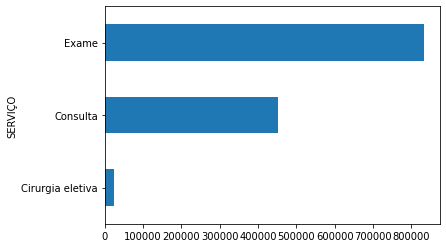

In [8]:
df.groupby('SERVIÇO').size().sort_values().plot(kind='barh')

Fizemos um agrupamento da base, em relação à coluna SERVIÇO, pegamos o tamanho do agrupamento, colocamos em ordem, e plotamos um gráfico do tipo barra horizontal

<AxesSubplot:ylabel='MUNICÍPIODERESIDÊNCIA'>

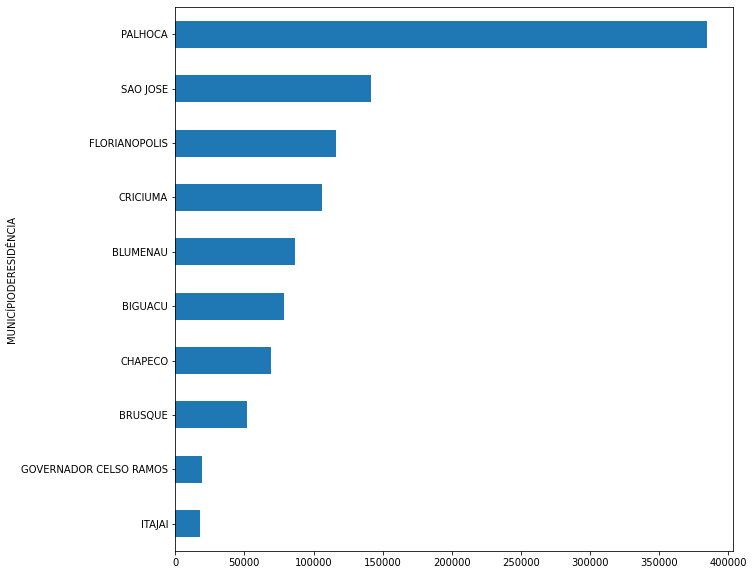

In [9]:
df.groupby('MUNICÍPIODERESIDÊNCIA').size().sort_values().tail(10).plot(kind='barh', figsize=(10,10))

Fizemos algo semelhante em relação aos municípios, como são muitos, pegamos os últimos 20, que são os maiores

**Exercício**

O que você percebe de errado neste gráfico?

<AxesSubplot:>

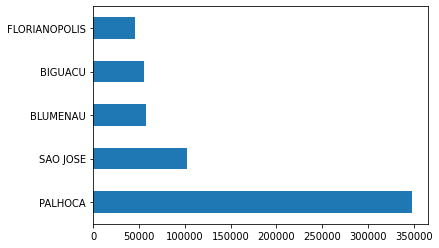

In [10]:
df.query('SERVIÇO == "Exame"')['MUNICÍPIODERESIDÊNCIA'].value_counts().head().plot(kind='barh')

Vamos entrevistar um subconjunto de dados relativos à Exames, quando fizemos groupby, estamos ainda com a base inteira, agrupada segundo um critério. Query cria um recorte, no caso de Exames. Aqui estamos usando value_counts, para o resultado da query, note que antes usamos size, que é mais geral.

In [11]:
df.query('SERVIÇO == "Exame"')['MUNICÍPIODERESIDÊNCIA'].value_counts().head()

PALHOCA          347913
SAO JOSE         102497
BLUMENAU          57577
BIGUACU           55737
FLORIANOPOLIS     45871
Name: MUNICÍPIODERESIDÊNCIA, dtype: int64

Muitas vezes precisamos ver os dados, não apenas em gráficos

Como são as Estatísticas em relação às pessoas que usam o SUS? Quantos exames cada uma realizou naquele mês de novembro, na média, qual o máximo de exames, etc

In [12]:
df.query('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "PALHOCA"').DOCUMENTO.value_counts().describe()

count    31797.000000
mean        10.941693
std         12.505739
min          1.000000
25%          2.000000
50%          4.000000
75%         18.000000
max         90.000000
Name: DOCUMENTO, dtype: float64

**Exercício**

O que você acha de muito diferente em relação aos dados acima

In [13]:
df.query('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "PALHOCA"').DOCUMENTO.value_counts().head(30)

704207709501384    90
700603418445267    80
700000291920300    80
700505394201153    78
702005327186289    77
707507227682290    75
700000481327406    73
705009265166954    72
702505393010938    72
704300595817291    71
700401459979541    71
706209092555063    70
700000538700909    70
708507058823680    70
708402202548668    70
702006343392182    68
705403451142599    68
701207073562413    68
200976607490004    68
702008818070283    66
706407182354586    66
705003225150857    66
705101347228440    66
701806282573675    66
706401140710281    65
702402575390327    65
705405426035492    64
703302250141610    64
704509193879620    64
700500912402652    64
Name: DOCUMENTO, dtype: int64

Quais são os exames concretos, associados a esses identificadores

In [14]:
df.query('DOCUMENTO == 704207709501384')[['DESCRIÇÃODOPROCEDIMENTO','DATADASOLICITAÇÃO', 'CENTRALDEREGULAÇÃO/RESPONSÁVEL', 'POSIÇÃO', 'CNESDACENTRALEXECUTANTE', 'CNESDAUNIDADESOLICITANTE']].sort_values(by='DESCRIÇÃODOPROCEDIMENTO').head(10)

,DESCRIÇÃODOPROCEDIMENTO,DATADASOLICITAÇÃO,CENTRALDEREGULAÇÃO/RESPONSÁVEL,POSIÇÃO,CNESDACENTRALEXECUTANTE,CNESDAUNIDADESOLICITANTE
264552,25 HIDROXIVITAMINA D (25 OHD),23/08/2017 11:07:41,CENTRO DE SAUDE VILA NOVA,6519,6082351,7124619
1189115,25 HIDROXIVITAMINA D (25 OHD),23/08/2017 11:07:41,CENTRO DE SAUDE VILA NOVA,4990,6939392,7124619
300253,ACIDO FOLICO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,10017,6082351,7124619
1224544,ACIDO FOLICO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,8466,6939392,7124619
264515,ACIDO URICO,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,6515,6082351,7124619
1189078,ACIDO URICO,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,4986,6939392,7124619
1189079,ANTIBIOGRAMA,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,4986,6939392,7124619
264516,ANTIBIOGRAMA,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,6515,6082351,7124619
300254,ANTIPEROXIDASE /ANTI TPO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,10017,6082351,7124619
1224545,ANTIPEROXIDASE /ANTI TPO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,8466,6939392,7124619


**Exercício**

Verifique os dados acima e elabore uma hipótese para o problema de Santa Catarina

In [15]:
df.query('DOCUMENTO == 700603418445267')[['DESCRIÇÃODOPROCEDIMENTO','DATADASOLICITAÇÃO', 'CENTRALDEREGULAÇÃO/RESPONSÁVEL', 'POSIÇÃO', 'CNESDACENTRALEXECUTANTE', 'CNESDAUNIDADESOLICITANTE']].sort_values(by='DESCRIÇÃODOPROCEDIMENTO').head(10)

,DESCRIÇÃODOPROCEDIMENTO,DATADASOLICITAÇÃO,CENTRALDEREGULAÇÃO/RESPONSÁVEL,POSIÇÃO,CNESDACENTRALEXECUTANTE,CNESDAUNIDADESOLICITANTE
194548,25 HIDROXIVITAMINA D (25 OHD),18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,339,6082351,5969018
1134084,25 HIDROXIVITAMINA D (25 OHD),18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,295,6939392,5969018
194549,ACIDO URICO,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,339,6082351,5969018
1134085,ACIDO URICO,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,295,6939392,5969018
194550,AMILASE,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,339,6082351,5969018
1134086,AMILASE,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,295,6939392,5969018
1134105,ANTI HBC - IGG ANTICORPOS IGG CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,296,6939392,5969018
194569,ANTI HBC - IGG ANTICORPOS IGG CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,340,6082351,5969018
1134106,ANTI HBC - IGM ANTICORPOS IGM CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,296,6939392,5969018
194570,ANTI HBC - IGM ANTICORPOS IGM CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,340,6082351,5969018


Observamos que nossa hipótese é comprovada nas maiores contagens, precisamos validar a hipótese analisado o dataset inteiro

In [16]:
def deduplicate_stats(query=None):
    if query:
        df_tmp = df.query(query)
    else:
        df_tmp = df
    total_rows = len(df_tmp)
    unique_rows = len(df_tmp.groupby(['DOCUMENTO', 'DESCRIÇÃODOPROCEDIMENTO']))
    unique_rows_same_date = len(df_tmp.groupby(['DOCUMENTO', 'DESCRIÇÃODOPROCEDIMENTO', 'DATADASOLICITAÇÃO']))
    reducao_fila = (total_rows - unique_rows) / total_rows
    print('           registros na fila:', total_rows)
    print('    registros únicos na fila:', unique_rows)
    print('          duplicados (total):', total_rows - unique_rows)
    print('duplicados (mesmo timestamp):', total_rows - unique_rows_same_date)
    print('    redução com deduplicação:', int(100*reducao_fila), '%')


Ao executar a célula carregamos nossa função. Ela recebe um argumento, caso não tenha sido passado nada, None, você irá usar toda a base, caso contrário, criar um dataframe temporário para a contagem. Queremos saber o número de duplicados gerais e os particulares, com mesma data e hora. Assim veremos se é um erro manual, ou algo sistêmico.

In [17]:
deduplicate_stats('MUNICÍPIODERESIDÊNCIA == "PALHOCA"')

           registros na fila: 384253
    registros únicos na fila: 223579
          duplicados (total): 160674
duplicados (mesmo timestamp): 160305
    redução com deduplicação: 41 %


In [ ]:
deduplicate_stats()

**Exercício**

Verifique os municípios de FLORIANOPOLIS e JOINVILLE

In [18]:
deduplicate_stats('MUNICÍPIODERESIDÊNCIA == "JOINVILLE"')

           registros na fila: 15208
    registros únicos na fila: 15186
          duplicados (total): 22
duplicados (mesmo timestamp): 0
    redução com deduplicação: 0 %


In [ ]:
deduplicate_stats('MUNICÍPIODERESIDÊNCIA == "FLORIANOPOLIS"')